In [1]:
# Prerequisite
import sys
if sys.version_info[0] < 3:
    raise Exception("Python 3 not detected.")
    
import numpy as np
import matplotlib.pyplot as plt 
from sklearn import svm
from scipy import io
from sklearn.metrics import accuracy_score

for data_name in ["mnist", "spam", "cifar10"]:
    data = io.loadmat("/Users/jinhan/Downloads/hw1/data/%s_data.mat" % data_name)
    print("\nloaded %s data!" % data_name)
    fields = "test_data", "training_data", "training_labels"
    for field in fields:
        print(field, data[field].shape)


loaded mnist data!
test_data (10000, 784)
training_data (60000, 784)
training_labels (60000, 1)

loaded spam data!
test_data (5857, 154)
training_data (5172, 154)
training_labels (5172, 1)

loaded cifar10 data!
test_data (10000, 3072)
training_data (50000, 3072)
training_labels (50000, 1)


In [2]:
# Question 1: Data Partitioning
import random
# mnist training and validation set
mnist_data = io.loadmat("/Users/jinhan/Downloads/hw1/data/mnist_data.mat")

# zip training data and training labels
mapped = list(zip(mnist_data['training_data'],mnist_data['training_labels']))

# shuffle the data with corresponding label
shuffled_mapped_array = random.sample(mapped, len(mapped))

# split validation set and the remaining training set
validation_set = shuffled_mapped_array[:10000]
remaining_set = shuffled_mapped_array[10000:]


""""""
# Spam training and validation set
spam_data = io.loadmat("/Users/jinhan/Downloads/hw1/data/spam_data.mat")

# zip training data and training labels
map_spam = list(zip(spam_data['training_data'], spam_data['training_labels']))

# shuffle the data with corresponding label
shuffled_spam_data = random.sample(map_spam, len(map_spam))

# split validation set and the remaining training set
validation_spam_set = shuffled_spam_data[:round(len(shuffled_spam_data)*0.2)]
remaining_spam_set = shuffled_spam_data[round(len(shuffled_spam_data)*0.2):]


""""""
# CIFAR-10 validation and training set
cifar_10_data = io.loadmat("/Users/jinhan/Downloads/hw1/data/cifar10_data.mat")

# zip training data and training labels
map_cifar_10 = list(zip(cifar_10_data['training_data'], cifar_10_data['training_labels']))

# shuffle the data with corresponding label
shuffled_cifar_10_data = random.sample(map_cifar_10, len(map_cifar_10))

# split validation set and the remaining training set
validation_cifar_10_set = shuffled_cifar_10_data[:5000]
remaining_cifar_10_set = shuffled_cifar_10_data[5000:]

In [3]:
# Question 2: SVM
# 2a)

# Unzip the features and labels
res = list(zip(*remaining_set)) 
mnist_tr_features = res[0]
mnist_tr_labels = res[1]

unzip_mnist_val = list(zip(*validation_set))
mnist_val_features = unzip_mnist_val[0]
mnist_val_labels = unzip_mnist_val[1]

# Different num examples of training sets (X_train)
training_100 = mnist_tr_features[:100]
training_200 = mnist_tr_features[100:300]
training_500 = mnist_tr_features[300:800]
training_1000 = mnist_tr_features[800:1800]
training_2000 = mnist_tr_features[1800:3800]
training_5000 = mnist_tr_features[3800:8800]
training_10000 = mnist_tr_features[8800:18800]

# Y_train
y_train_100 = mnist_tr_labels[:100]
y_train_200 = mnist_tr_labels[100:300]
y_train_500 = mnist_tr_labels[300:800]
y_train_1000 = mnist_tr_labels[800:1800]
y_train_2000 = mnist_tr_labels[1800:3800]
y_train_5000 = mnist_tr_labels[3800:8800]
y_train_10000 = mnist_tr_labels[8800:18800]

# X_test 

x_test = mnist_val_features

# Y_test

y_test = mnist_val_labels 

# Create svm Classifier for each num example
clf_100 = svm.SVC(kernel='linear') # Linear Kernel
clf_200 = svm.SVC(kernel='linear')
clf_500 = svm.SVC(kernel='linear')
clf_1000 = svm.SVC(kernel='linear')
clf_2000 = svm.SVC(kernel='linear')
clf_5000 = svm.SVC(kernel='linear')
clf_10000 = svm.SVC(kernel='linear')

# Fit the model to each respective data
clf_100.fit(training_100, np.ravel(y_train_100))
clf_200.fit(training_200, np.ravel(y_train_200))
clf_500.fit(training_500, np.ravel(y_train_500))
clf_1000.fit(training_1000, np.ravel(y_train_1000))
clf_2000.fit(training_2000, np.ravel(y_train_2000))
clf_5000.fit(training_5000, np.ravel(y_train_5000))
clf_10000.fit(training_10000, np.ravel(y_train_10000))

# Predict the response for test dataset
y_pred_100 = clf_100.predict(x_test) 
y_pred_200 = clf_200.predict(x_test)
y_pred_500 = clf_500.predict(x_test)
y_pred_1000 = clf_1000.predict(x_test)
y_pred_2000 = clf_2000.predict(x_test)
y_pred_5000 = clf_5000.predict(x_test)
y_pred_10000 = clf_10000.predict(x_test)



print("Validation accuracy for 100 examples is ", accuracy_score(y_test,y_pred_100)) # Validation accuracy 
print("Training accuracy for 100 examples is ", accuracy_score(y_train_100,clf_100.predict(training_100))) # Training accuracy 

print("Validation accuracy for 200 examples is ", accuracy_score(y_test,y_pred_200)) # Validation accuracy 
print("Training accuracy for 200 examples is ", accuracy_score(y_train_200,clf_200.predict(training_200))) # Training accuracy 

print("Validation accuracy for 500 examples is ", accuracy_score(y_test,y_pred_500)) # Validation accuracy 
print("Training accuracy for 500 examples is ", accuracy_score(y_train_500,clf_500.predict(training_500))) # Training accuracy 

print("Validation accuracy for 1000 examples is ", accuracy_score(y_test,y_pred_1000)) # Validation accuracy 
print("Training accuracy for 1000 examples is ", accuracy_score(y_train_1000,clf_1000.predict(training_1000))) # Training accuracy 

print("Validation accuracy for 2000 examples is ", accuracy_score(y_test,y_pred_2000)) # Validation accuracy 
print("Training accuracy for 2000 examples is ", accuracy_score(y_train_2000,clf_2000.predict(training_2000))) # Training accuracy 

print("Validation accuracy for 5000 examples is ", accuracy_score(y_test,y_pred_5000)) # Validation accuracy 
print("Training accuracy for 5000 examples is ", accuracy_score(y_train_5000,clf_5000.predict(training_5000))) # Training accuracy 

print("Validation accuracy for 10000 examples is ", accuracy_score(y_test,y_pred_10000)) # Validation accuracy 
print("Training accuracy for 10000 examples is ", accuracy_score(y_train_10000,clf_10000.predict(training_10000))) # Training accuracy 






Validation accuracy for 100 examples is  0.7411
Training accuracy for 100 examples is  1.0
Validation accuracy for 200 examples is  0.8197
Training accuracy for 200 examples is  1.0
Validation accuracy for 500 examples is  0.8562
Training accuracy for 500 examples is  1.0
Validation accuracy for 1000 examples is  0.8893
Training accuracy for 1000 examples is  1.0
Validation accuracy for 2000 examples is  0.8967
Training accuracy for 2000 examples is  1.0
Validation accuracy for 5000 examples is  0.9053
Training accuracy for 5000 examples is  1.0
Validation accuracy for 10000 examples is  0.9079
Training accuracy for 10000 examples is  1.0


In [4]:
#2b)

num_examples = [100, 200, 500, 1000, 2000, "ALL"]

# Unzip the features and labels 

spam_res = list(zip(*remaining_spam_set)) 
spam_features = spam_res[0]
spam_labels = spam_res[1]

unzip_spam_val = list(zip(*validation_spam_set))
spam_val_features = unzip_spam_val[0]
spam_val_labels = unzip_spam_val[1]

# Note that your test sets are your validation sets for both x and y
spam_x_test = spam_val_features
spam_y_test = spam_val_labels

""""""
# 100 EXAMPLES 
""""""
spam_x_train_100 = spam_features[:100]
spam_y_train_100 = spam_labels[:100]

# Create svm Classifier for 100 examples
spam_clf_100 = svm.SVC(kernel='linear') # Linear Kernel

# Fit the model 
spam_clf_100.fit(spam_x_train_100, np.ravel(spam_y_train_100))

# Predict the response for the test dataset
spam_y_pred_100 = spam_clf_100.predict(spam_x_test)

# Accuracy Score
acc_sc_100_val = accuracy_score(spam_y_test, spam_y_pred_100) #Validation Accuracy 
acc_sc_100_tr = accuracy_score(spam_y_train_100,spam_clf_100.predict(spam_x_train_100)) # Train Accuracy

""""""
# 200 EXAMPLES
""""""
spam_x_train_200 = spam_features[100:300]
spam_y_train_200 = spam_labels[100:300]

# Create svm Classifier for 200 examples
spam_clf_200 = svm.SVC(kernel='linear') # Linear Kernel

# Fit the model 
spam_clf_200.fit(spam_x_train_200, np.ravel(spam_y_train_200))

# Predict the response for the test dataset
spam_y_pred_200 = spam_clf_200.predict(spam_x_test)

# Accuracy Score
acc_sc_200_val = accuracy_score(spam_y_test, spam_y_pred_200) #Validation Accuracy 
acc_sc_200_tr = accuracy_score(spam_y_train_200,spam_clf_200.predict(spam_x_train_200)) # Train Accuracy 

""""""
# 500 EXAMPLES
""""""
spam_x_train_500 = spam_features[300:800]
spam_y_train_500 = spam_labels[300:800]

# Create svm Classifier for 500 examples
spam_clf_500 = svm.SVC(kernel='linear') # Linear Kernel

# Fit the model 
spam_clf_500.fit(spam_x_train_500, np.ravel(spam_y_train_500))

# Predict the response for the test dataset
spam_y_pred_500 = spam_clf_500.predict(spam_x_test)

# Accuracy Score
acc_sc_500_val = accuracy_score(spam_y_test, spam_y_pred_500) #Validation Accuracy 
acc_sc_500_tr = accuracy_score(spam_y_train_500,spam_clf_500.predict(spam_x_train_500)) # Train Accuracy

""""""
# 1000 EXAMPLES
""""""
spam_x_train_1000 = spam_features[800:1800]
spam_y_train_1000 = spam_labels[800:1800]

# Create svm Classifier for 1000 examples
spam_clf_1000 = svm.SVC(kernel='linear') # Linear Kernel

# Fit the model 
spam_clf_1000.fit(spam_x_train_1000, np.ravel(spam_y_train_1000))

# Predict the response for the test dataset
spam_y_pred_1000 = spam_clf_1000.predict(spam_x_test)

# Accuracy Score
acc_sc_1000_val = accuracy_score(spam_y_test, spam_y_pred_1000) #Validation Accuracy 
acc_sc_1000_tr = accuracy_score(spam_y_train_1000,spam_clf_1000.predict(spam_x_train_1000)) # Train Accuracy

""""""
# 2000 EXAMPLES
""""""
spam_x_train_2000 = spam_features[1800:3800]
spam_y_train_2000 = spam_labels[1800:3800]

# Create svm Classifier for 2000 examples
spam_clf_2000 = svm.SVC(kernel='linear') # Linear Kernel

# Fit the model 
spam_clf_2000.fit(spam_x_train_2000, np.ravel(spam_y_train_2000))

# Predict the response for the test dataset
spam_y_pred_2000 = spam_clf_2000.predict(spam_x_test)

# Accuracy Score
acc_sc_2000_val = accuracy_score(spam_y_test, spam_y_pred_2000) #Validation Accuracy 
acc_sc_2000_tr = accuracy_score(spam_y_train_2000,spam_clf_2000.predict(spam_x_train_2000)) # Train Accuracy

""""""
# ALL
""""""
spam_x_train_all = spam_features[:]
spam_y_train_all = spam_labels[:]


# Create svm Classifier for all examples
spam_clf_all = svm.SVC(kernel='linear') # Linear Kernel

# Fit the model 
spam_clf_all.fit(spam_x_train_all, np.ravel(spam_y_train_all))

# Predict the response for the test dataset
spam_y_pred_all = spam_clf_all.predict(spam_x_test)

# Accuracy Score
acc_sc_all_val = accuracy_score(spam_y_test, spam_y_pred_all) #Validation Accuracy 
acc_sc_all_tr = accuracy_score(spam_y_train_all,spam_clf_all.predict(spam_x_train_all)) # Train Accuracy

print("The spam validation accuracy for 100 examples is ", acc_sc_100_val) # Validation accuracy 
print("The spam training accuracy for 100 examples is ", acc_sc_100_tr) # Training accuracy 

print("The spam validation accuracy for 200 examples is ", acc_sc_200_val) # Validation accuracy 
print("The spam training accuracy for 200 examples is ", acc_sc_200_tr) # Training accuracy 

print("The spam validation accuracy for 500 examples is ", acc_sc_500_val) # Validation accuracy 
print("The spam training accuracy for 500 examples is ", acc_sc_500_tr) # Training accuracy 

print("The spam validation accuracy for 1000 examples is ", acc_sc_1000_val) # Validation accuracy 
print("The spam training accuracy for 1000 examples is ", acc_sc_1000_tr) # Training accuracy 

print("The spam validation accuracy for 2000 examples is ", acc_sc_2000_val) # Validation accuracy 
print("The spam training accuracy for 2000 examples is ", acc_sc_2000_tr) # Training accuracy 

print("The spam validation accuracy for all examples is ", acc_sc_all_val) # Validation accuracy 
print("The spam training accuracy for all examples is ", acc_sc_all_tr) # Training accuracy 





The spam validation accuracy for 100 examples is  0.7959381044487428
The spam training accuracy for 100 examples is  0.97
The spam validation accuracy for 200 examples is  0.8152804642166345
The spam training accuracy for 200 examples is  0.975
The spam validation accuracy for 500 examples is  0.844294003868472
The spam training accuracy for 500 examples is  0.928
The spam validation accuracy for 1000 examples is  0.8597678916827853
The spam training accuracy for 1000 examples is  0.933
The spam validation accuracy for 2000 examples is  0.8713733075435203
The spam training accuracy for 2000 examples is  0.922
The spam validation accuracy for all examples is  0.8752417794970987
The spam training accuracy for all examples is  0.916384726921218


In [5]:
#2c) 

# CIFAR-10 validation and training set
cifar_10_data = io.loadmat("/Users/jinhan/Downloads/hw1/data/cifar10_data.mat")

# zip training data and training labels
map_cifar_10 = list(zip(cifar_10_data['training_data'], cifar_10_data['training_labels']))

# shuffle the data with corresponding label
shuffled_cifar_10_data = random.sample(map_cifar_10, len(map_cifar_10))

# split validation set and the remaining training set
validation_cifar_10_set = shuffled_cifar_10_data[:5000]
remaining_cifar_10_set = shuffled_cifar_10_data[5000:]

cifar10_num_examples = [100, 200, 500, 1000, 2000, 5000]

# Unzip the features and labels

cifar10_unzip = list(zip(*remaining_cifar_10_set)) 
cifar10_tr_features = cifar10_unzip[0]
cifar10_tr_labels = cifar10_unzip[1]

unzip_cifar10_val = list(zip(*validation_cifar_10_set))
cifar10_val_features = unzip_cifar10_val[0]
cifar10_val_labels = unzip_cifar10_val[1]

# Note that your test sets are your validation sets for both x and y for all num examples
cifar10_x_test = cifar10_val_features
cifar10_y_test = cifar10_val_labels

""""""
# 100 Examples
""""""
cifar10_x_100 = cifar10_tr_features[:100]
cifar10_y_100 = cifar10_tr_labels[:100]

# Create an SVM classifer model 
cifar10_clf_100 = svm.SVC(kernel='linear') # Linear Kernel

# Fit the model 
cifar10_clf_100.fit(cifar10_x_100, np.ravel(cifar10_y_100))

# Predict the response for the test dataset
cifar10_y_pred_100 = cifar10_clf_100.predict(cifar10_x_test)

# Accuracy Score
acc_sc_cifar10_100_val = accuracy_score(cifar10_y_test, cifar10_y_pred_100) #Validation Accuracy 
acc_sc_cifar10_100_tr = accuracy_score(cifar10_y_100,cifar10_clf_100.predict(cifar10_x_100)) # Train Accuracy

""""""
# 200 Examples
""""""
cifar10_x_200 = cifar10_tr_features[100:300]
cifar10_y_200 = cifar10_tr_labels[100:300]

# Create an SVM classifer model 
cifar10_clf_200 = svm.SVC(kernel='linear') # Linear Kernel

# Fit the model 
cifar10_clf_200.fit(cifar10_x_200, np.ravel(cifar10_y_200))

# Predict the response for the test dataset
cifar10_y_pred_200 = cifar10_clf_200.predict(cifar10_x_test)

# Accuracy Score
acc_sc_cifar10_200_val = accuracy_score(cifar10_y_test, cifar10_y_pred_200) #Validation Accuracy 
acc_sc_cifar10_200_tr = accuracy_score(cifar10_y_200,cifar10_clf_200.predict(cifar10_x_200)) # Train Accuracy

""""""
# 500 Examples
""""""
cifar10_x_500 = cifar10_tr_features[300:800]
cifar10_y_500 = cifar10_tr_labels[300:800]

# Create an SVM classifer model 
cifar10_clf_500 = svm.SVC(kernel='linear') # Linear Kernel

# Fit the model 
cifar10_clf_500.fit(cifar10_x_500, np.ravel(cifar10_y_500))

# Predict the response for the test dataset
cifar10_y_pred_500 = cifar10_clf_500.predict(cifar10_x_test)

# Accuracy Score
acc_sc_cifar10_500_val = accuracy_score(cifar10_y_test, cifar10_y_pred_500) #Validation Accuracy 
acc_sc_cifar10_500_tr = accuracy_score(cifar10_y_500,cifar10_clf_500.predict(cifar10_x_500)) # Train Accuracy

""""""
# 1000 Examples
""""""
cifar10_x_1000 = cifar10_tr_features[800:1800]
cifar10_y_1000 = cifar10_tr_labels[800:1800]

# Create an SVM classifer model 
cifar10_clf_1000 = svm.SVC(kernel='linear') # Linear Kernel

# Fit the model 
cifar10_clf_1000.fit(cifar10_x_1000, np.ravel(cifar10_y_1000))

# Predict the response for the test dataset
cifar10_y_pred_1000 = cifar10_clf_1000.predict(cifar10_x_test)

# Accuracy Score
acc_sc_cifar10_1000_val = accuracy_score(cifar10_y_test, cifar10_y_pred_1000) #Validation Accuracy 
acc_sc_cifar10_1000_tr = accuracy_score(cifar10_y_1000,cifar10_clf_1000.predict(cifar10_x_1000)) # Train Accuracy

""""""
# 2000 Examples
""""""
cifar10_x_2000 = cifar10_tr_features[1800:3800]
cifar10_y_2000 = cifar10_tr_labels[1800:3800]

# Create an SVM classifer model 
cifar10_clf_2000 = svm.SVC(kernel='linear') # Linear Kernel

# Fit the model 
cifar10_clf_2000.fit(cifar10_x_2000, np.ravel(cifar10_y_2000))

# Predict the response for the test dataset
cifar10_y_pred_2000 = cifar10_clf_2000.predict(cifar10_x_test)

# Accuracy Score
acc_sc_cifar10_2000_val = accuracy_score(cifar10_y_test, cifar10_y_pred_2000) #Validation Accuracy 
acc_sc_cifar10_2000_tr = accuracy_score(cifar10_y_2000,cifar10_clf_2000.predict(cifar10_x_2000)) # Train Accuracy

""""""
# 5000 Examples
""""""
cifar10_x_5000 = cifar10_tr_features[3800:8800]
cifar10_y_5000 = cifar10_tr_labels[3800:8800]

# Create an SVM classifer model 
cifar10_clf_5000 = svm.SVC(kernel='linear') # Linear Kernel

# Fit the model 
cifar10_clf_5000.fit(cifar10_x_5000, np.ravel(cifar10_y_5000))

# Predict the response for the test dataset
cifar10_y_pred_5000 = cifar10_clf_5000.predict(cifar10_x_test)

# Accuracy Score
acc_sc_cifar10_5000_val = accuracy_score(cifar10_y_test, cifar10_y_pred_5000) #Validation Accuracy 
acc_sc_cifar10_5000_tr = accuracy_score(cifar10_y_5000,cifar10_clf_5000.predict(cifar10_x_5000)) # Train Accuracy
    
print("The cifar_10 validation accuracy for 100 examples is ", acc_sc_cifar10_100_val) # Validation accuracy 
print("The cifar_10 training accuracy for 100 examples is ", acc_sc_cifar10_100_tr) # Training accuracy 

print("The cifar_10 validation accuracy for 200 examples is ", acc_sc_cifar10_200_val) # Validation accuracy 
print("The cifar_10 training accuracy for 200 examples is ", acc_sc_cifar10_200_tr) # Training accuracy 

print("The cifar_10 validation accuracy for 500 examples is ", acc_sc_cifar10_500_val) # Validation accuracy 
print("The cifar_10 training accuracy for 500 examples is ", acc_sc_cifar10_500_tr) # Training accuracy 

print("The cifar_10 validation accuracy for 1000 examples is ", acc_sc_cifar10_1000_val) # Validation accuracy 
print("The cifar_10 training accuracy for 1000 examples is ", acc_sc_cifar10_1000_tr) # Training accuracy 

print("The cifar_10 validation accuracy for 2000 examples is ", acc_sc_cifar10_2000_val) # Validation accuracy 
print("The cifar_10 training accuracy for 2000 examples is ", acc_sc_cifar10_2000_tr) # Training accuracy 

print("The cifar_10 validation accuracy for 5000 examples is ", acc_sc_cifar10_5000_val) # Validation accuracy 
print("The cifar_10 training accuracy for 5000 examples is ", acc_sc_cifar10_5000_tr) # Training accuracy 






The cifar_10 validation accuracy for 100 examples is  0.2048
The cifar_10 training accuracy for 100 examples is  1.0
The cifar_10 validation accuracy for 200 examples is  0.2524
The cifar_10 training accuracy for 200 examples is  1.0
The cifar_10 validation accuracy for 500 examples is  0.2862
The cifar_10 training accuracy for 500 examples is  1.0
The cifar_10 validation accuracy for 1000 examples is  0.284
The cifar_10 training accuracy for 1000 examples is  1.0
The cifar_10 validation accuracy for 2000 examples is  0.2956
The cifar_10 training accuracy for 2000 examples is  1.0
The cifar_10 validation accuracy for 5000 examples is  0.305
The cifar_10 training accuracy for 5000 examples is  1.0


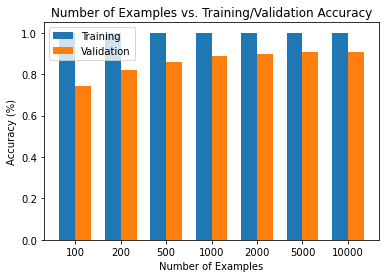

In [7]:
# MNIST Plot
mnist_plot_labels = [100, 200, 500, 1000, 2000,5000, 10000]

mnist_val_acc = [accuracy_score(y_test,y_pred_100),
    accuracy_score(y_test,y_pred_200),
    accuracy_score(y_test,y_pred_500),
    accuracy_score(y_test,y_pred_1000),
    accuracy_score(y_test,y_pred_2000),
    accuracy_score(y_test,y_pred_5000),
    accuracy_score(y_test,y_pred_10000)]

mnist_tr_acc = [accuracy_score(y_train_100,clf_100.predict(training_100)),
    accuracy_score(y_train_200,clf_200.predict(training_200)),
    accuracy_score(y_train_500,clf_500.predict(training_500)),
    accuracy_score(y_train_1000,clf_1000.predict(training_1000)),
    accuracy_score(y_train_2000,clf_2000.predict(training_2000)),
    accuracy_score(y_train_5000,clf_5000.predict(training_5000)),
    accuracy_score(y_train_10000,clf_10000.predict(training_10000))]

x = np.arange(len(mnist_plot_labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, mnist_tr_acc, width, label='Training')
rects2 = ax.bar(x + width/2, mnist_val_acc, width, label='Validation')
ax.set_xticks(x)
ax.set_xticklabels(mnist_plot_labels)

plt.xlabel("Number of Examples");
plt.ylabel("Accuracy (%)");
plt.title("Number of Examples vs. Training/Validation Accuracy");
plt.legend();

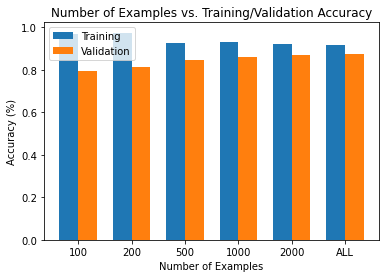

In [8]:
# Spam/ham Plot
spam_plot_labels = [100, 200, 500, 1000, 2000, 'ALL']
spam_val_acc = [acc_sc_100_val,
acc_sc_200_val,
acc_sc_500_val,
acc_sc_1000_val,
acc_sc_2000_val,
acc_sc_all_val]

spam_tr_acc = [acc_sc_100_tr,
acc_sc_200_tr,
acc_sc_500_tr,
acc_sc_1000_tr,
acc_sc_2000_tr,
acc_sc_all_tr
]

x = np.arange(len(spam_plot_labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, spam_tr_acc, width, label='Training')
rects2 = ax.bar(x + width/2, spam_val_acc, width, label='Validation')
ax.set_xticks(x)
ax.set_xticklabels(spam_plot_labels)

plt.xlabel("Number of Examples");
plt.ylabel("Accuracy (%)");
plt.title("Number of Examples vs. Training/Validation Accuracy");
plt.legend();

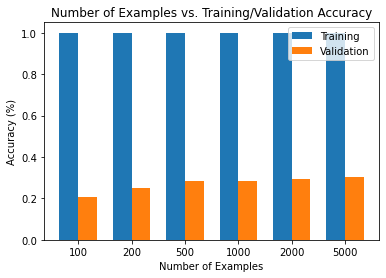

In [9]:
# CIFAR_10 plot
cifar10_plot_labels = [100, 200, 500, 1000, 2000, 5000 ]

cifar10_val_acc = [acc_sc_cifar10_100_val,
acc_sc_cifar10_200_val,
acc_sc_cifar10_500_val,
acc_sc_cifar10_1000_val,
acc_sc_cifar10_2000_val,
acc_sc_cifar10_5000_val
]

cifar10_tr_acc = [acc_sc_cifar10_100_tr,
acc_sc_cifar10_200_tr,
acc_sc_cifar10_500_tr,
acc_sc_cifar10_1000_tr,
acc_sc_cifar10_2000_tr,
acc_sc_cifar10_5000_tr
]

x = np.arange(len(cifar10_plot_labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, cifar10_tr_acc, width, label='Training')
rects2 = ax.bar(x + width/2, cifar10_val_acc, width, label='Validation')
ax.set_xticks(x)
ax.set_xticklabels(cifar10_plot_labels)

plt.xlabel("Number of Examples");
plt.ylabel("Accuracy (%)");
plt.title("Number of Examples vs. Training/Validation Accuracy");
plt.legend();


In [10]:
# Question 3: Hyperparameter Tuning

test_set = validation_set
unzipped_features = mnist_tr_features[:10000]
unzipped_labels = mnist_tr_labels[:10000]

c1_model = svm.LinearSVC(C= 1)
c2_model = svm.LinearSVC(C= 2**-3)
c3_model = svm.LinearSVC( C= 10)
c4_model = svm.LinearSVC( C= 100)
c5_model = svm.LinearSVC( C= 2**-10)
c6_model = svm.LinearSVC(C= 2**-15)
c7_model = svm.LinearSVC( C= 1000)
c8_model = svm.LinearSVC( C= 5000)
c9_model = svm.LinearSVC(C= 2**-100)
c10_model = svm.LinearSVC(C= 2**-500)
c11_model = svm.LinearSVC(C= 2**-20) 
c12_model = svm.LinearSVC(C= 2**-25)
c13_model = svm.LinearSVC(C= 2**-23)
c14_model = svm.LinearSVC(C= 2**-21) 
c15_model = svm.LinearSVC(C= 2**-22)
c16_model = svm.LinearSVC(C= 2**-21.5)
c17_model = svm.LinearSVC(C= 2**-20.5) # <-- Highest accuracy so far


def hyperparameter_search(x):
    x.fit(unzipped_features, np.ravel(unzipped_labels))
    y_pred = x.predict(x_test)
    return accuracy_score(y_test, y_pred)
c_models = [c1_model, c2_model, c3_model, c4_model, c5_model, c6_model, c7_model,
            c8_model,c9_model, c10_model, c11_model, c12_model, c13_model, c14_model,
            c15_model, c16_model, c17_model]
range_of_num_models = range(1, len(c_models) + 1)
for N in range_of_num_models:
    print(f"The c{N}_model's validation accuracy is: ", hyperparameter_search(c_models[N-1]))
        

/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


The c1_model's validation accuracy is:  0.8551


/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


The c2_model's validation accuracy is:  0.8599


/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


The c3_model's validation accuracy is:  0.8601


/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


The c4_model's validation accuracy is:  0.8363


/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


The c5_model's validation accuracy is:  0.8605


/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


The c6_model's validation accuracy is:  0.885


/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


The c7_model's validation accuracy is:  0.8543


/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


The c8_model's validation accuracy is:  0.8349
The c9_model's validation accuracy is:  0.6401
The c10_model's validation accuracy is:  0.6401
The c11_model's validation accuracy is:  0.9011
The c12_model's validation accuracy is:  0.8945
The c13_model's validation accuracy is:  0.9019
The c14_model's validation accuracy is:  0.9036
The c15_model's validation accuracy is:  0.9043
The c16_model's validation accuracy is:  0.905
The c17_model's validation accuracy is:  0.902


In [11]:
# The best C value is 2^-20.5. (c17_model)

In [12]:
# Question 4: K-Fold Validation
# Note: The cross-validation accuracy we report is the accuracy averaged over the k iterations.

k = 5
x_folds_features = np.array_split(spam_features, k)
y_folds_labels = np.array_split(np.ravel(spam_labels),k)
k_fold_avg_val_acc_score = []
for model in c_models:
    for i in range(k):
        val_acc_score = []
        x_train_fold = x_folds_features.copy()
        x_test_fold = x_folds_features[i]
        y_train_fold = y_folds_labels.copy()
        y_test_fold = y_folds_labels[i]
        del x_train_fold[i]
        del y_train_fold[i]
        x_train_fold = np.concatenate(x_train_fold)
        y_train_fold = np.concatenate(y_train_fold)
        model.fit(x_train_fold, y_train_fold)
        y_fold_pred = model.predict(x_test_fold)
        acc_score = accuracy_score(y_test_fold,y_fold_pred)
        val_acc_score.append(acc_score)
    average_score = np.mean(val_acc_score)
    k_fold_avg_val_acc_score.append(average_score)

range_of_num_models = range(1, len(c_models) + 1)
for N in range_of_num_models:
    print(f"The c{N}_model's K-fold validation accuracy is: ", k_fold_avg_val_acc_score[N-1])
    

/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations

The c1_model's K-fold validation accuracy is:  0.9044740024183797
The c2_model's K-fold validation accuracy is:  0.898428053204353
The c3_model's K-fold validation accuracy is:  0.9068923821039904
The c4_model's K-fold validation accuracy is:  0.905683192261185
The c5_model's K-fold validation accuracy is:  0.8403869407496977
The c6_model's K-fold validation accuracy is:  0.7617896009673518
The c7_model's K-fold validation accuracy is:  0.9044740024183797
The c8_model's K-fold validation accuracy is:  0.8548972188633616
The c9_model's K-fold validation accuracy is:  0.727932285368803
The c10_model's K-fold validation accuracy is:  0.727932285368803
The c11_model's K-fold validation accuracy is:  0.7303506650544136
The c12_model's K-fold validation accuracy is:  0.727932285368803
The c13_model's K-fold validation accuracy is:  0.7267230955259976
The c14_model's K-fold validation accuracy is:  0.7303506650544136
The c15_model's K-fold validation accuracy is:  0.727932285368803
The c16_mo

In [13]:
# c7_model, which has C = 1000 , has the highest accuracyof 83.3% amongst all models, thus having the best C value. 

In [14]:
# Question 5: Kaggle Competition 
bunch_of_words_for_features = ['cash',  'click', 'action', 'fantastic', 'friend','guarantee',
                  'collect','clearance',
                  'certified','affordable','limited','instant','rates',
                  'win','medicine','lose','purchase','html','#1','100%','best',
                  'consolidate','earn','eliminate','million','order','please','obligation',
                  'removal','refinance','quote','discount','mortgage','loan','income',
                  'investment','debt','special','promotion','risk','lowest','consultation',
                  'body','%','opportunity','report','mail','send','language','email',
                  'program','our','list','one','receive','a','an','the','of','no','yes',
                  'with','dollars','status','dig','meet','singles','babes','friends',
                  'work','home','sleep','claims','hidden','unsecured','explore','refund',
                  'compliance','stock','pick','alert','disclaimer','get','paid','sample',
                  'wife','teen','success','solution','never','medium','problem','harvest',
                  'marketing','traffic','sales','open','internet','direct','trial','performance',
                  'subscribe','unsubscribe','website','visit','we','hate','eyes','human',
                  'growth','hormone','weight','life','insurance','medical','exams','online',
                  'pharmacy','stop','4u','50%','off','join','americans','hundred','percent']#51

